# **Project Name**    - Uber Data Analytics



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Uber Data Analysis, Finding Trends and Patterns in Between deliveries from Uber Company

#### **Define Your Business Objective?**

1 - Finding Which Point has hishest Pickup | 
2 - Which days has More Requests | 
3 - Take buisness decisions based on requests | 

# **General Guidelines** : -  

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [28]:
df = pd.read_csv(r'D:\Uber Data Analytics\data\Cleaned_Uber_Date.csv', parse_dates=['Request_timestamp', 'Drop_timestamp'])


### Dataset First View

In [29]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     2831 non-null   datetime64[ns]
 6   Delivery_Time      2831 non-null   object        
 7   Request_Weekday    6745 non-null   object        
 8   Delivery_Time_Min  6745 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 474.4+ KB


Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
Delivery_Time        3914
Request_Weekday         0
Delivery_Time_Min       0
dtype: int64

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

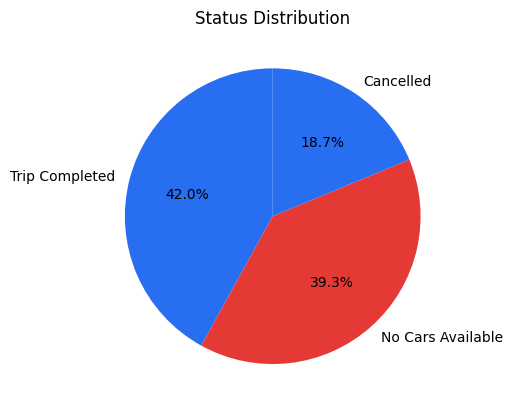

In [31]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#276EF1', '#E53935'])
plt.title('Status Distribution')
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

This shart showed how much Requests were canceled, completed annd where cars were not availabe

##### 2. What is/are the insight(s) found from the chart?

42% Trips are Completed and 39 % times, cars were not avaiable

##### 3. Will the gained insights help creating a positive business impact?
Yes, this tells us that we need to uncrease number of cars so that requests doesnt go waste

#### Chart - 2

C:\Users\chaud\AppData\Local\Temp\ipykernel_13384\3183151444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Request_Weekday', data=df, order=weekday_order, palette='coolwarm')


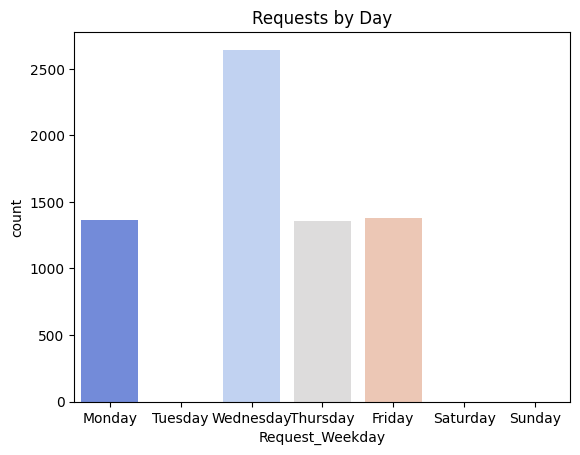

In [32]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='Request_Weekday', data=df, order=weekday_order, palette='coolwarm')
plt.title("Requests by Day")
plt.show()


##### 1. Why did you pick the specific chart?

Bar chrt is good for easy visualizing small categories

##### 2. What is/are the insight(s) found from the chart?

Wednessday has highest ammount of reqquests whereas Saturdayss, Sundays and Tuesdays has no requests

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focussing on days where there are no requests and improving sev=rvices on days of hight request can create huge impact on buisness

#### Chart - 3

C:\Users\chaud\AppData\Local\Temp\ipykernel_13384\3892772293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pickup_point', data=cancel_df, palette='Reds')


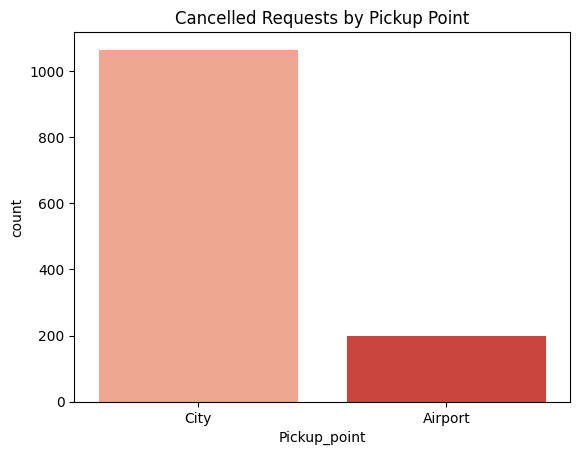

In [33]:
cancel_df = df[df['Status'] == 'Cancelled']
sns.countplot(x='Pickup_point', data=cancel_df, palette='Reds')
plt.title("Cancelled Requests by Pickup Point")
plt.show()


##### 2. What is/are the insight(s) found from the chart?

Cities has almost 5x cancel rates than that of Airport

#### Chart - 4

C:\Users\chaud\AppData\Local\Temp\ipykernel_13384\1948007349.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Request_Weekday', y='Delivery_Time_Min', data=df,
C:\Users\chaud\AppData\Local\Temp\ipykernel_13384\1948007349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Request_Weekday', y='Delivery_Time_Min', data=df,


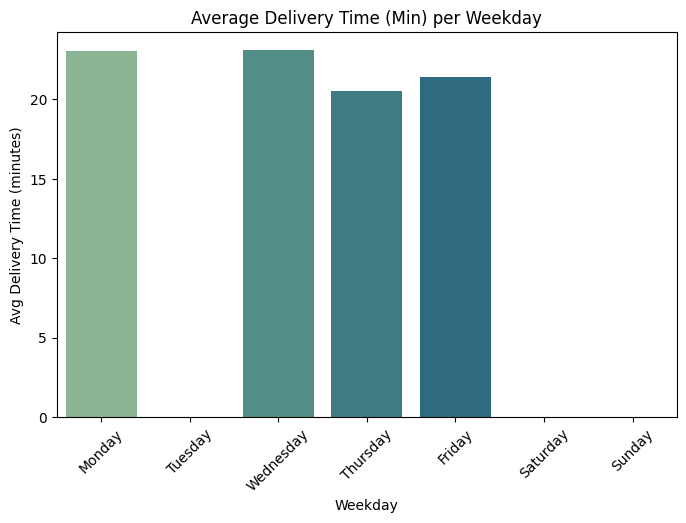

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='Request_Weekday', y='Delivery_Time_Min', data=df, 
            estimator='mean', ci=None, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            palette='crest')
plt.title("Average Delivery Time (Min) per Weekday")
plt.ylabel("Avg Delivery Time (minutes)")
plt.xlabel("Weekday")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Finding out minimum deliver time 

##### 2. What is/are the insight(s) found from the chart?

Thrusday has minimum average delivery time

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There might be several reason that thrusday has minimun deliver time like traffic, requests but overall improving traffic management or optimizing routes based on traffic on other days can increase buisness

#### Chart - 5

C:\Users\chaud\AppData\Local\Temp\ipykernel_13384\527508705.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cancel_rate = df.groupby('Request_Weekday').apply(


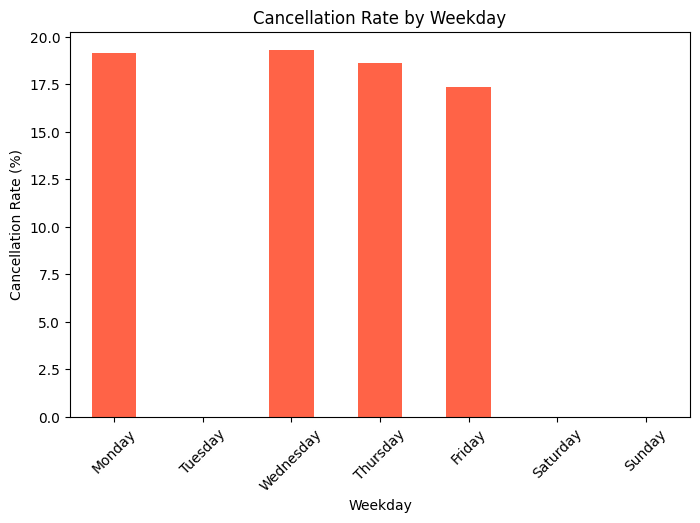

In [41]:
cancel_rate = df.groupby('Request_Weekday').apply(
    lambda x: (x['Status'] == 'Cancelled').mean() * 100
).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(8,5))
cancel_rate.plot(kind='bar', color='tomato')
plt.title("Cancellation Rate by Weekday")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Weekday")
plt.xticks(rotation=45)
plt.show()


##### 2. What is/are the insight(s) found from the chart?

Friday has least cancelation rate wwhereas wednesdays and mondays have the highest cancellation rates 

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. 🚗 Improve Driver Supply During High Demand Periods
Insight:

Peak request times (identified via heatmaps or daily trends) show demand surges, especially on specific weekdays or time blocks.

Many requests may be cancelled or unfulfilled due to lack of drivers (Driver_id is null).

Recommendation:

Dynamically allocate or incentivize drivers during high-demand times using surge pricing or bonuses.

Send driver notifications before peak periods in specific zones.Answer Here.

2. 🛑 Reduce Cancellations at Key Pickup Points
Insight:

High cancellation rates were observed in areas like Airport or City.

Possibly due to long wait times or mismatched driver-passenger expectations.

Recommendation:

Improve driver wait time visibility for users in those zones.

Deploy dedicated standby drivers in high-cancellation zones.

Offer priority matching or in-app prompts like “High demand area — confirm pickup in advance.”

3. ⏱️ Optimize Routes and Delivery Time
Insight:

Average delivery times vary significantly across pickup points and days.

Long delivery durations affect efficiency and user satisfaction.

Recommendation:

Use real-time traffic APIs to optimize routing.

Implement machine learning models to predict delivery delays and adjust driver assignment accordingly.

# **Conclusion**

The data analysis reveals clear patterns in Uber’s ride requests, cancellations, and delivery times. Peak demand occurs on specific weekdays, with higher cancellations at key pickup points like the Airport. Delivery time varies significantly, especially during high-traffic periods.

To improve operations, Uber should optimize driver allocation, reduce cancellations through better communication and incentives, and target low-demand days with offers. These data-driven actions can enhance service reliability, customer satisfaction, and operational efficiency.